In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf 

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips.shape

(244, 7)

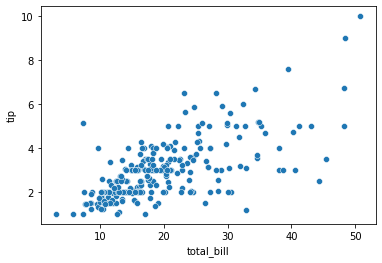

In [4]:
sns.scatterplot(data=tips, x="total_bill", y='tip')

In [5]:
np.corrcoef(tips.total_bill, tips.tip)

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [6]:
# Параметричческая корреляция Пирсона

In [7]:
scipy.stats.pearsonr(tips.total_bill, tips.tip)

(0.6757341092113646, 6.692470646863191e-34)

In [8]:
# Непараметричческая корреляция Спирмена

In [9]:
scipy.stats.spearmanr(tips.total_bill, tips.tip)

SpearmanrResult(correlation=0.6789681219001009, pvalue=2.501158440923619e-34)

In [10]:
# Строим регрессионную прямую

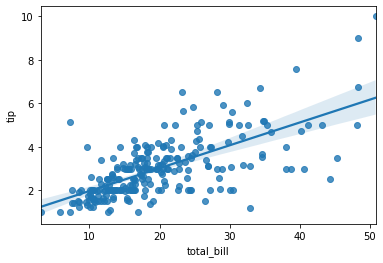

In [11]:
sns.regplot(data=tips, x="total_bill", y='tip')

In [12]:
# Рассчет регрессии через scipy

In [13]:
scipy.stats.linregress(tips.total_bill, tips.tip)

LinregressResult(slope=0.1050245173843534, intercept=0.9202696135546726, rvalue=0.6757341092113641, pvalue=6.692470646864404e-34, stderr=0.007364789848762602, intercept_stderr=0.1597347463764325)

In [14]:
# Рассчет регрессии через statmodels

In [15]:
X = sm.add_constant(tips.total_bill)

In [16]:
model = sm.OLS(tips.tip, X)

In [17]:
result = model.fit()

In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.69e-34
Time:                        19:10:55   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

In [20]:
# то же самое можно через формулу

results = smf.ols('tip ~ total_bill', data=tips).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           6.69e-34
Time:                        19:11:06   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

In [24]:
boston_dataset = load_boston()
boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

In [25]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
boston['CRIM_log'] = np.log(boston.CRIM)

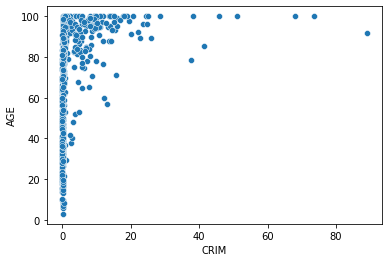

In [27]:
sns.scatterplot(data=boston, x="CRIM", y="AGE")

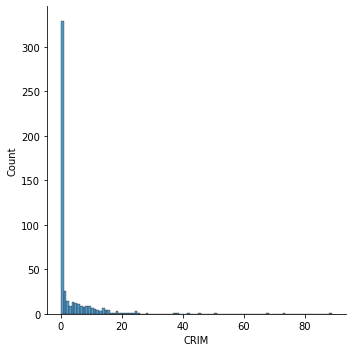

In [28]:
sns.displot(boston.CRIM)

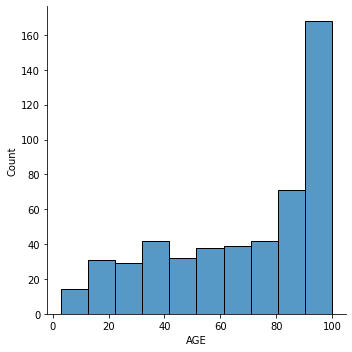

In [29]:
sns.displot(boston.AGE)

In [30]:
# Пробуем "отрезать" выбросы

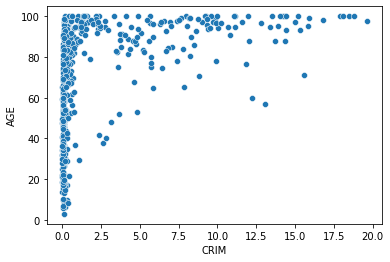

In [31]:
sns.scatterplot(data=boston[boston.CRIM < 20], x="CRIM", y="AGE")

In [32]:
# Смортим на скаттерплот с логорифмированными значениями

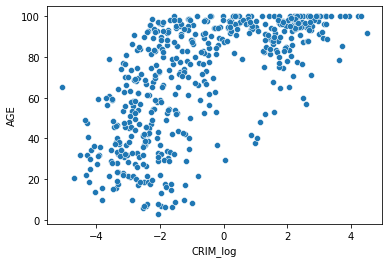

In [33]:
sns.scatterplot(data=boston, x="CRIM_log", y="AGE")

In [34]:
# Непараметричческая корреляция Спирмена

In [35]:
scipy.stats.spearmanr(boston.CRIM_log, boston.AGE)

SpearmanrResult(correlation=0.7041399841460586, pvalue=5.689192531057184e-77)

In [36]:
scipy.stats.spearmanr(boston.CRIM, boston.AGE)

SpearmanrResult(correlation=0.7041399841460586, pvalue=5.689192531057184e-77)

In [37]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM_log
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,0.666486
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.517091
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.730821
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.028496
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.788616
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.306943
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.658284
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.681903
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.853407
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.828234
